In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load the dataset
data_url = '/content/train.csv'  # Path to the downloaded dataset
df = pd.read_csv(data_url)
# Check the first few rows of the DataFrame
print(df.head())



   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [15]:


df.fillna(df.mean(), inplace=True)
print(df)

      GrLivArea  BedroomAbvGr  FullBath  SalePrice
0          1710             3         2     208500
1          1262             3         2     181500
2          1786             3         2     223500
3          1717             3         1     140000
4          2198             4         2     250000
...         ...           ...       ...        ...
1455       1647             3         2     175000
1456       2073             3         2     210000
1457       2340             4         2     266500
1458       1078             2         1     142125
1459       1256             3         1     147500

[1460 rows x 4 columns]


In [17]:
# Select relevant features and the target
df = df[['GrLivArea', 'BedroomAbvGr', 'FullBath', 'SalePrice']]
# Check for missing values
df = df.dropna()

# Split the features and target
X = df[['GrLivArea', 'BedroomAbvGr', 'FullBath']]  # Features: square footage, bedrooms, bathrooms
y = df['SalePrice']  # Target: house price
# Print the shapes of the train and test sets
print("Training data shape (features):", X_train.shape)
print("Test data shape (features):", X_test.shape)
print("Training target shape:", y_train.shape)
print("Test target shape:", y_test.shape)

Training data shape (features): (1168, 3)
Test data shape (features): (292, 3)
Training target shape: (1168,)
Test target shape: (292,)


In [18]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Predict house prices on the test set
y_pred = model.predict(X_test)

# Print the first 5 predictions and the corresponding actual values
print("Predicted prices:", y_pred[:5])
print("Actual prices:", y_test[:5].values)

Predicted prices: [113410.67255298 305081.87775899 135904.78562983 205424.67564124
 227502.68349004]
Actual prices: [154500 325000 115000 159000 315500]


In [19]:
# Create the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)
# Display the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Display the model's coefficients and intercept
print("Model coefficients (for GrLivArea, BedroomAbvGr, FullBath):", model.coef_)
print("Model intercept:", model.intercept_)


Mean Squared Error: 2806426667.247853
Model coefficients (for GrLivArea, BedroomAbvGr, FullBath): [   104.02630701 -26655.16535734  30014.32410896]
Model intercept: 52261.74862694461


In [12]:
# Predict house prices on the test set
y_pred = model.predict(X_test)

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Print the coefficients
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


Mean Squared Error: 2806426667.247853
Coefficients: [   104.02630701 -26655.16535734  30014.32410896]
Intercept: 52261.74862694461


In [13]:
# Predict the price for a house with specific square footage, bedrooms, and bathrooms
new_house = [[2000, 3, 2]]  # Example: 2000 sq ft, 3 bedrooms, 2 bathrooms
predicted_price = model.predict(new_house)
print(f"Predicted price for the new house: ${predicted_price[0]:,.2f}")


Predicted price for the new house: $240,377.51


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


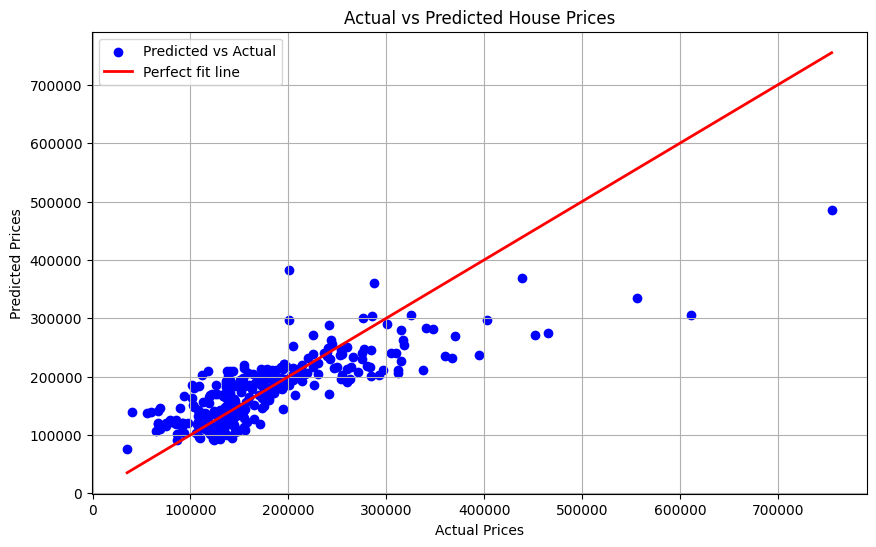

In [14]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, label='Perfect fit line')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.legend()
plt.grid(True)
plt.show()
